# Accumulation/Distribution Index (ADI) 🛑
🛑🛑 No useful indicator 

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.volume import AccDistIndexIndicator

In [52]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations

In [53]:
adi = AccDistIndexIndicator(df.high, df.low, df.close, df.volume)
df["adi_v"] = adi.acc_dist_index()
adi = AccDistIndexIndicator(df.high, df.low, df.close, df.trades)
df["adi_t"] = adi.acc_dist_index()      

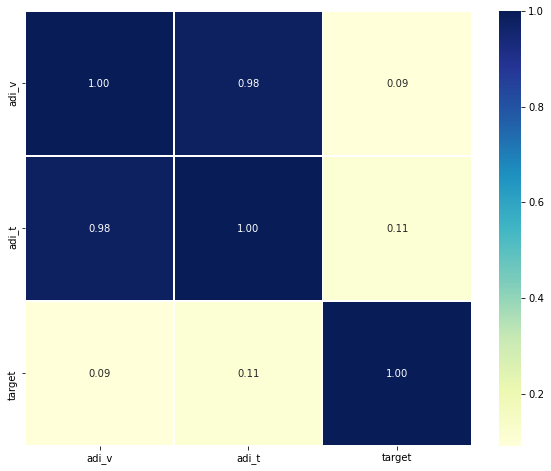

In [54]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

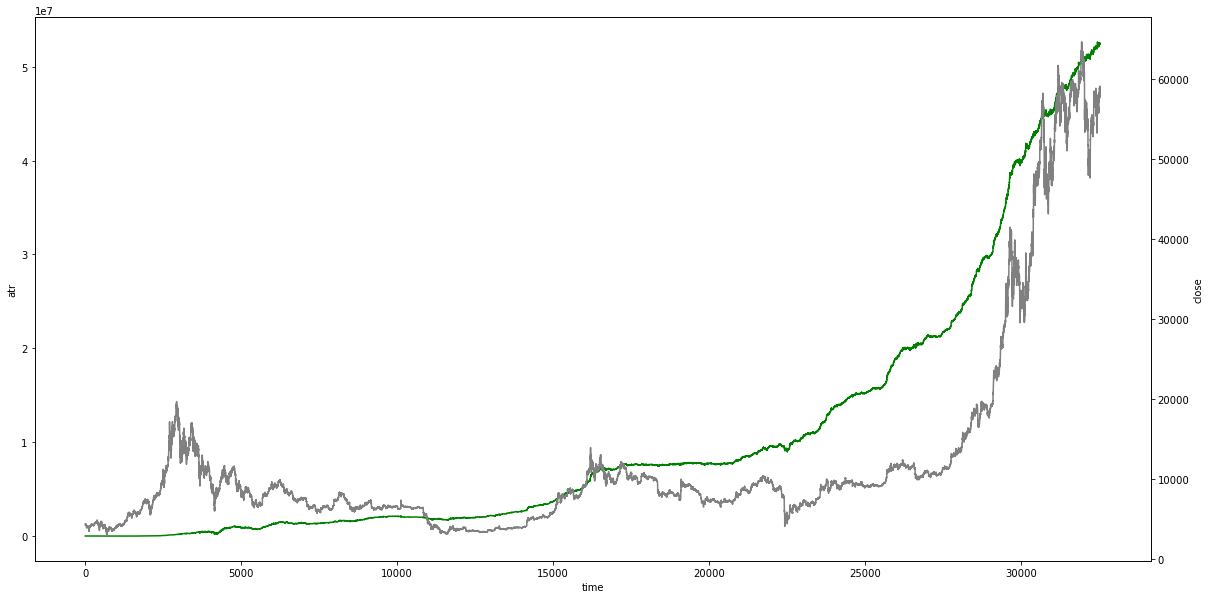

In [55]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.adi_t,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Get over close

In [65]:
df["adiv_o_close"] = list(map(lambda a, c: a/c, df.adi_v, df.close))
df["adiv_o_close_rate"] = uf.get_rate(uf.get_moving_average(df.adiv_o_close, 20))
df["rate_amplified"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), df.adiv_o_close_rate))
# df["adit_o_close"] = list(map(lambda a, c: a-c, df.adi_t, df.close))
# df["adiv_log"] = list(map(lambda x: uf.log_abs(x), df.adi_v))

In [66]:
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,target,adi_v,adi_t,adiv_o_close,adiv_o_close_rate,rate_amplified
0,2017-08-17 04:00:00.000,4261.48,4313.62,4261.32,4308.83,47.181009,1502945999999,2.023661e+05,171,35.160503,1.509525e+05,7887.635513,0,3.853868e+01,1.396772e+02,0.008944,NaN,NaN
1,2017-08-17 05:00:00.000,4308.83,4328.69,4291.37,4315.32,23.234916,1502949599999,1.003048e+05,102,21.448071,9.260828e+04,8039.262402,0,4.512564e+01,1.685936e+02,0.010457,NaN,NaN
2,2017-08-17 06:00:00.000,4330.29,4345.45,4309.37,4324.35,7.229691,1502953199999,3.128231e+04,36,4.802861,2.079532e+04,8041.760498,0,4.389931e+01,1.624872e+02,0.010152,NaN,NaN
3,2017-08-17 07:00:00.000,4316.62,4349.99,4287.41,4349.99,4.443249,1502956799999,1.924106e+04,25,2.602292,1.129135e+04,8048.127886,0,4.834256e+01,1.874872e+02,0.011113,NaN,NaN
4,2017-08-17 08:00:00.000,4333.32,4377.85,4333.32,4360.69,0.972807,1502960399999,4.239504e+03,28,0.814655,3.552747e+03,8018.036500,0,4.856561e+01,1.939072e+02,0.011137,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,2021-05-08 15:00:00,58947.47,58947.48,57472.95,57599.87,5851.539191,1620489599999,3.408746e+08,140494,2843.709612,1.656895e+08,0.000000,0,3.749967e+06,5.235132e+07,65.103743,-0.005436,0.000000
32532,2021-05-08 16:00:00,57599.86,58500.00,57560.63,58381.14,4739.339671,1620493199999,2.753576e+08,137969,2172.633797,1.262157e+08,0.000000,0,3.753507e+06,5.245438e+07,64.293145,-0.043916,-1.479684
32533,2021-05-08 17:00:00,58381.14,59050.45,58139.91,58898.98,3815.391269,1620496799999,2.241230e+08,108370,1870.545827,1.098718e+08,0.000000,0,3.756053e+06,5.252669e+07,63.771106,-0.083953,-2.127670
32534,2021-05-08 18:00:00,58901.45,59251.04,58901.45,59060.57,2937.039406,1620500399999,1.734920e+08,105800,1551.876404,9.167612e+07,0.000000,0,3.755790e+06,5.251720e+07,63.592168,-0.110711,-2.404336


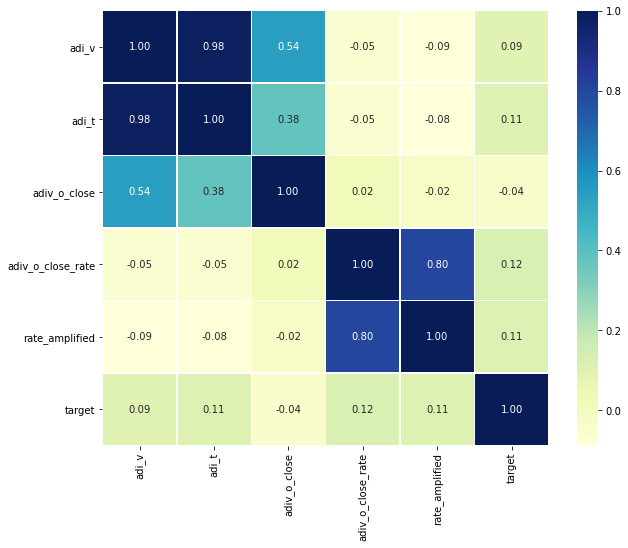

In [67]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

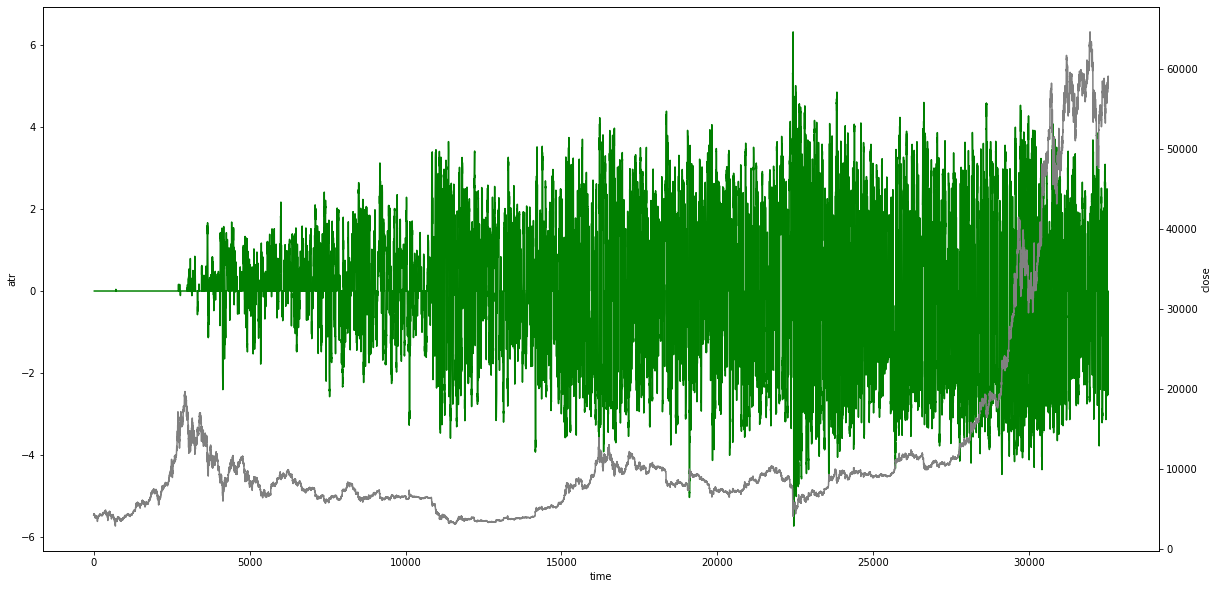

In [68]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.rate_amplified,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Get rate

In [46]:
df["adiv_sma_20"] = uf.get_moving_average(df.adi_v, 20)
df["adiv_rate_20"] = uf.get_rate(df.adiv_sma_200)
df["adiv_rate_20_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df.adiv_rate_20))

# df["adit_rate"] = uf.get_rate(df.adi_t)

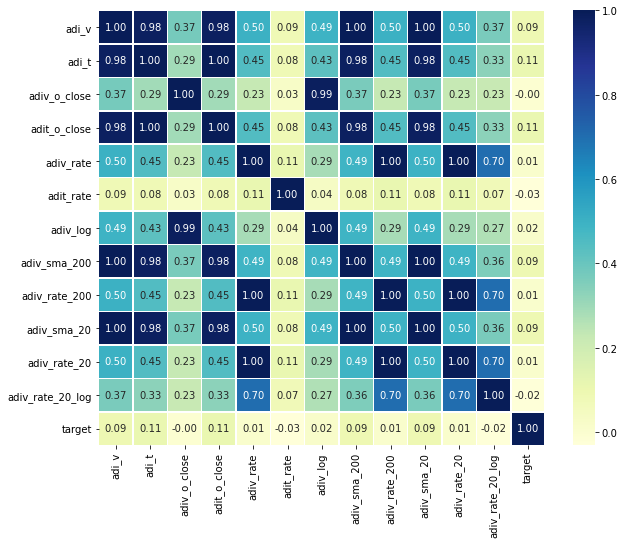

In [47]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

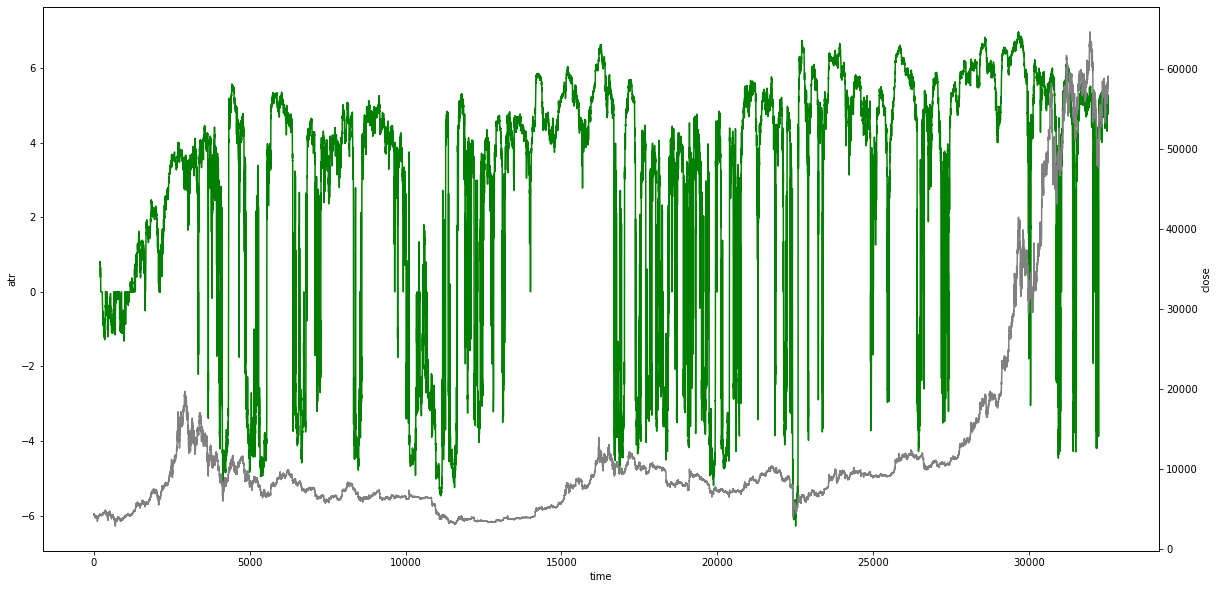

In [49]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.adiv_rate_20_log,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()